<a href="https://colab.research.google.com/github/ruchithareddy269/Dm-assignment-8/blob/main/f_timeseries.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install matplotlib
!pip install seaborn
!pip install prophet

In [ ]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

In [ ]:
import pandas as pd
from prophet import Prophet

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
dataset_file_path = '/content/drive/MyDrive/dm-assignment-6/covid19_timeseries.csv'

In [ ]:
# Load the dataset
file_path = dataset_file_path
data = pd.read_csv(file_path)

In [ ]:
# Ensure the column names are "ds" and "y"
data = data.rename(columns={'date_column_name': 'ds', 'target_column_name': 'y'})
global_agg = data.groupby('Dates').sum()
global_agg


<ipython-input-10-0517f875cb59>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  global_agg = data.groupby('Dates').sum()


,Lat,Long,Confirmed Cases,Death Cases,Recovered Cases
Dates,,,,,
2020-01-22,5603.86785,6403.971914,555,17,28.0
2020-01-23,5603.86785,6403.971914,654,18,30.0
2020-01-24,5603.86785,6403.971914,941,26,36.0
2020-01-25,5603.86785,6403.971914,1434,42,43.0
2020-01-26,5603.86785,6403.971914,2118,56,102.0
...,...,...,...,...,...
2020-10-25,5603.86785,6403.971914,42960467,1153729,0.0
2020-10-26,5603.86785,6403.971914,43498333,1159490,0.0
2020-10-27,5603.86785,6403.971914,43965280,1166892,0.0


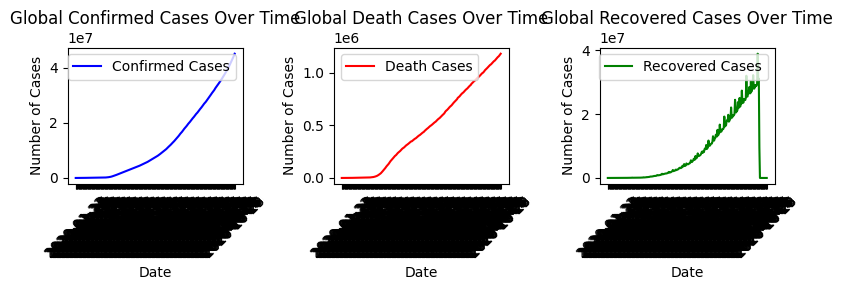

In [ ]:
# Plotting global trends
plt.figure(figsize=(8, 3))

plt.subplot(1, 3, 1)
plt.plot(global_agg.index, global_agg['Confirmed Cases'], label='Confirmed Cases', color='blue')
plt.title('Global Confirmed Cases Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Cases')
plt.xticks(rotation=45)
plt.legend()

plt.subplot(1, 3, 2)
plt.plot(global_agg.index, global_agg['Death Cases'], label='Death Cases', color='red')
plt.title('Global Death Cases Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Cases')
plt.xticks(rotation=45)
plt.legend()

plt.subplot(1, 3, 3)
plt.plot(global_agg.index, global_agg['Recovered Cases'], label='Recovered Cases', color='green')
plt.title('Global Recovered Cases Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Cases')
plt.xticks(rotation=45)
plt.legend()

plt.tight_layout()
plt.show()


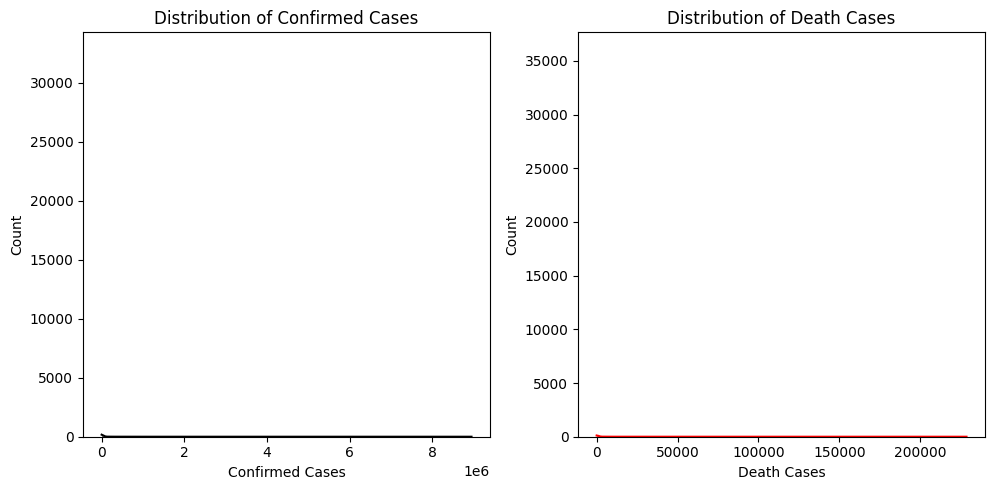

In [21]:
# Histograms for distribution analysis
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.histplot(data['Confirmed Cases'], kde=True, color='black')
plt.title('Distribution of Confirmed Cases')

plt.subplot(1, 3, 2)
sns.histplot(data['Death Cases'], kde=True, color='red')
plt.title('Distribution of Death Cases')


plt.tight_layout()
plt.show()

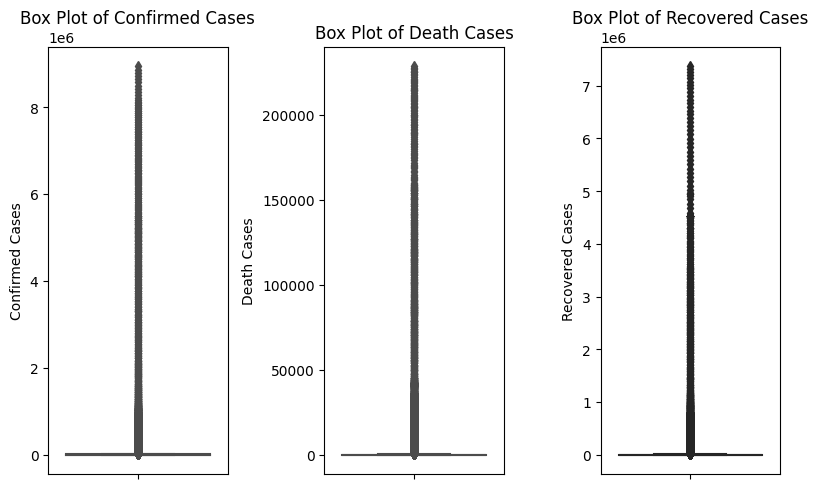

In [19]:
# Box plots for outlier detection
plt.figure(figsize=(8, 5))

plt.subplot(1, 3, 1)
sns.boxplot(data=data, y='Confirmed Cases', color='blue')
plt.title('Box Plot of Confirmed Cases')

plt.subplot(1, 3, 2)
sns.boxplot(data=data, y='Death Cases', color='red')
plt.title('Box Plot of Death Cases')

plt.subplot(1, 3, 3)
sns.boxplot(data=data, y='Recovered Cases', color='green')
plt.title('Box Plot of Recovered Cases')

plt.tight_layout()
plt.show()


In [26]:
import pandas as pd

# Filter and rename columns for the US
us_data = data[data['Country/Region'] == 'US'][['Dates', 'Death Cases']]
us_data.rename(columns={'Dates': 'ds', 'Death Cases': 'y'}, inplace=True)
us_data['ds'] = pd.to_datetime(us_data['ds'])

# Summary statistics
summary_stats = us_data.describe()
global_agg = us_data.groupby('ds').sum()
global_agg


,y
ds,
2020-01-22,0
2020-01-23,0
2020-01-24,0
2020-01-25,0
2020-01-26,0
...,...
2020-10-25,225233
2020-10-26,225710
2020-10-27,226696


**Transformation**

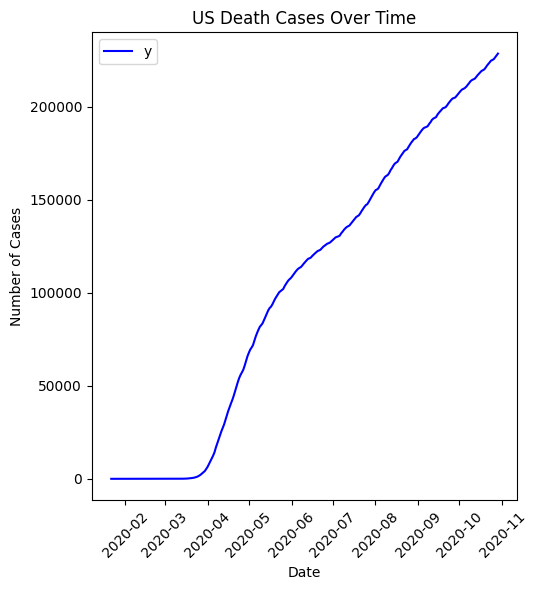

In [27]:
# Plotting global trends
plt.figure(figsize=(15, 6))

plt.subplot(1, 3, 2)
plt.plot(global_agg.index, global_agg['y'], label='y', color='blue')
plt.title('US Death Cases Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Cases')
plt.xticks(rotation=45)
plt.legend()

plt.tight_layout()
plt.show()

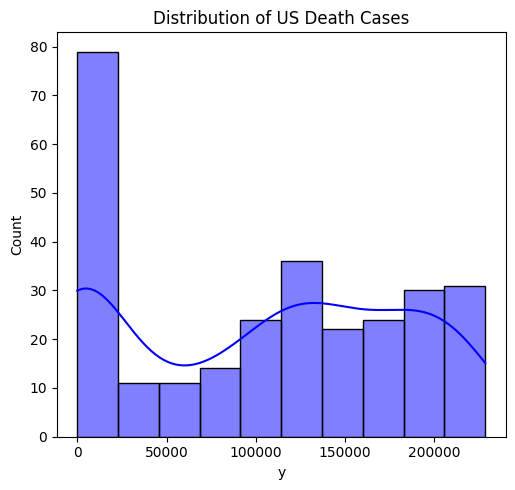

In [28]:
# Histograms for distribution analysis
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 2)
sns.histplot(us_data['y'], kde=True, color='blue')
plt.title('Distribution of US Death Cases')

plt.tight_layout()
plt.show()

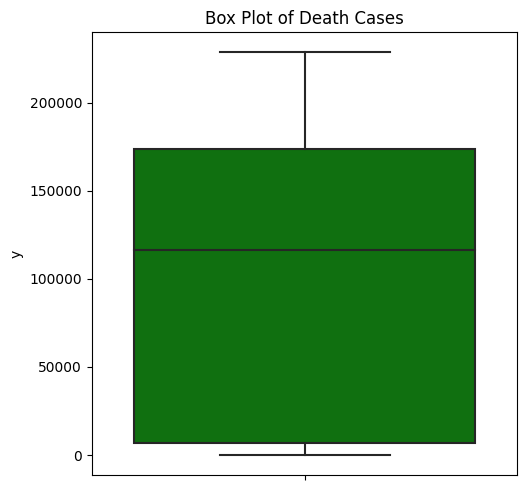

In [29]:
# Box plots for outlier detection
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 2)
sns.boxplot(data=us_data, y='y', color='green')
plt.title('Box Plot of Death Cases')

plt.tight_layout()
plt.show()

**Modeling**

In [30]:
model = Prophet()
model.fit(us_data)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpry40gz5h/wb3y0q44.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpry40gz5h/f2zjoghh.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=29504', 'data', 'file=/tmp/tmpry40gz5h/wb3y0q44.json', 'init=/tmp/tmpry40gz5h/f2zjoghh.json', 'output', 'file=/tmp/tmpry40gz5h/prophet_modeloifubh9_/prophet_model-20231126174424.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
17:44:24 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
17:44:24 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [31]:
future = model.make_future_dataframe(periods=365)
future.tail()
forecast = model.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()


,ds,yhat,yhat_lower,yhat_upper
642,2021-10-25,494865.764992,127951.590334,891616.739612
643,2021-10-26,495771.860597,127094.410731,893447.332583
644,2021-10-27,496746.382383,126019.864343,895804.065503
645,2021-10-28,497613.033819,126272.305451,897107.643070
646,2021-10-29,498462.155243,126617.691052,899058.460574


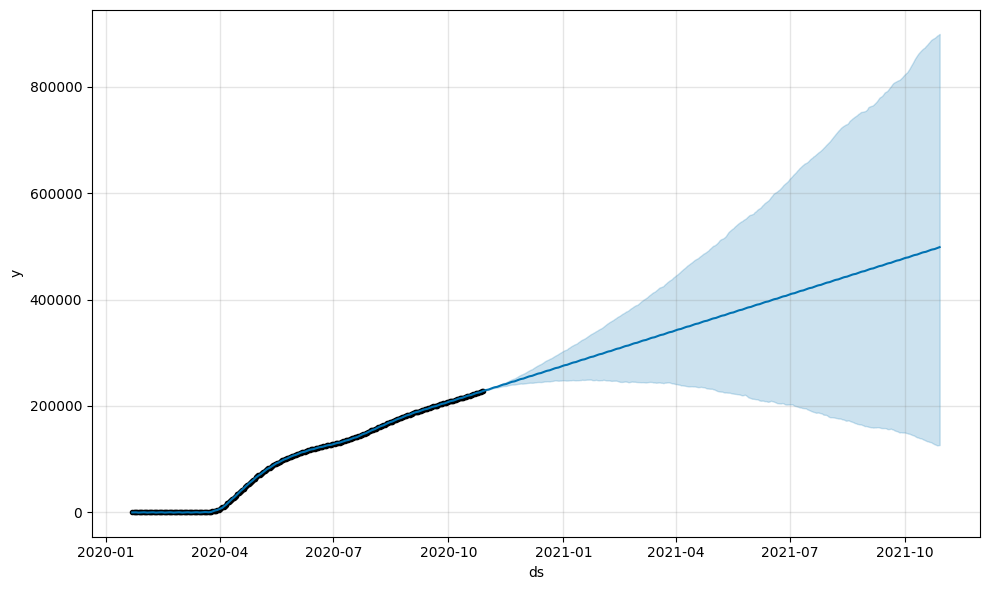

In [32]:
fig1 = model.plot(forecast)